In [16]:
import pandas as pd
from sklearn.decomposition import PCA
from sklearn.preprocessing import scale, StandardScaler
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, precision_score, recall_score
import matplotlib as mpl
import matplotlib.pyplot as plt
import drugfeatures

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier, plot_tree

def DropNull(features):
    features = features.replace(99, pd.NA)
    features = features.replace(96, pd.NA)
    features = features.replace(9, pd.NA)
    features = features.dropna(axis=0)
    return features

def y_replace(y):
    y = y.replace(2,1)
    y = y.replace(3,1)
    y = y.replace(4,2)
    y = y.replace(5,2)
    y = y.replace(6,2)
    y = y.replace(7,2)
    y = y.replace(8,2)
    return y

def DecisionTree(X,y,label):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)
    
    model = DecisionTreeClassifier()
    model.fit(X_train_scaled, y_train)
    
    y_pred = model.predict(X_test_scaled)

    print(label, "- Accuracy:", accuracy_score(y_test, y_pred))
    print("\nClassification Report:\n", classification_report(y_test, y_pred, zero_division=1))

    cm = confusion_matrix(y_test, y_pred, labels = model.classes_)
    print(label, '- Confusion Matrix:\n')
    print(model.classes_)
    print(cm, '\n\n_______________________________________________________________________\n')

In [17]:
dv_features = drugfeatures.dv_features
bullied_features = drugfeatures.bullied_features
bully_features = drugfeatures.bully_features
tb_features = drugfeatures.tb_features
can_features = drugfeatures.can_features

In [18]:
dv_df = DropNull(dv_features)
bullied_df = DropNull(bullied_features)
bully_df = DropNull(bully_features)
tb_df = DropNull(tb_features)
can_df = DropNull(can_features)

In [19]:
# Drop target variable 'ALC_050' from X variable used in PCA

# Copy this line 5x and replace variables
# Example: X_dv for demographic features, X_bullied for experienced bullying features
X_dv = dv_df.drop('ALC_050', axis=1)
X_bullied = bullied_df.drop('ALC_050', axis=1)
X = dv_df.drop('ALC_050', axis=1)
X = dv_df.drop('ALC_050', axis=1)
X = dv_df.drop('ALC_050', axis=1)

X = pd.DataFrame(scale(X), index = X.index, columns = X.columns)

# Make sure to have a y variable for each set of features, otherwise there will be a mismatched values error output
y_dv = dv_df['ALC_050']
y_bullied = bullied_df['ALC_050']
y = dv_df['ALC_050']
y = dv_df['ALC_050']
y = dv_df['ALC_050']

y_dv = y_replace(y_dv)
y_bullied = y_replace(y_bullied)
y = y_replace(y)
y = y_replace(y)
y = y_replace(y)


In [20]:
# Copy 5x so that there is a pca_loadings dataframe for each set of features (example 'dv_pca_loadings')
dv_pca_loadings = pd.DataFrame(PCA().fit(X_dv).components_.T, index=X_dv.columns, columns=['V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7'])
bullied_pca_loadings = pd.DataFrame(PCA().fit(X_bullied).components_.T, index=X_bullied.columns, columns=['V1', 'V2', 'V3', 'V4', 'V5', 'V6'])

In [22]:
#pca_loadings

In [23]:
pca = PCA()

# Copy 5x so that there is a df_plot dataframe for each set of features (example 'dv_df_plot')
dv_df_plot = pd.DataFrame(pca.fit_transform(X_dv), columns = ['PC1', 'PC2', 'PC3', 'PC4', 'PC5', 'PC6', 'PC7'], index=X_dv.index)
bullied_df_plot = pd.DataFrame(pca.fit_transform(X_bullied), columns = ['PC1', 'PC2', 'PC3', 'PC4', 'PC5', 'PC6'], index=X_bullied.index)

NameError: name 'df_plot' is not defined

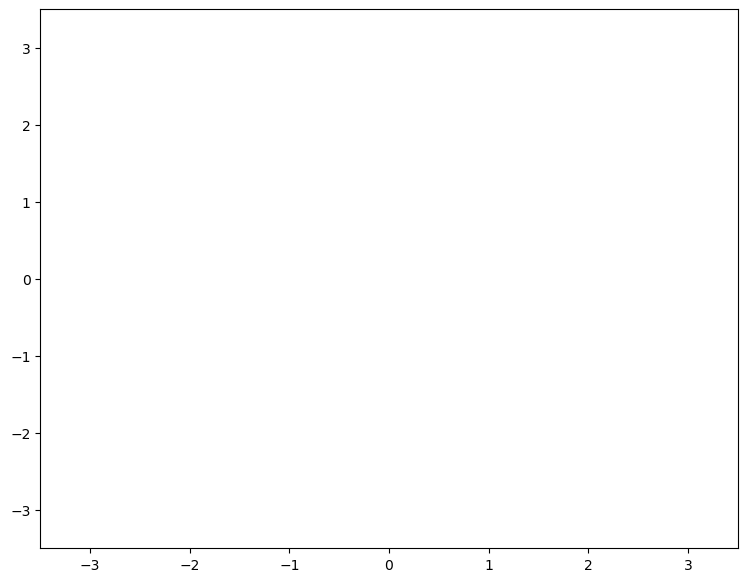

In [24]:
# Not sure if its necessary to make biplots for every set of values, dont worry about this for now

fig , ax1 = plt.subplots(figsize=(9,7))

ax1.set_xlim(-3.5,3.5)
ax1.set_ylim(-3.5,3.5)

# Plot Principal Components 1 and 2
df_plot_sample = df_plot.head(50)
for i in df_plot_sample.index:
    ax1.annotate(i, (-df_plot_sample.PC1.loc[i], -df_plot_sample.PC2.loc[i]), ha='center')

# Plot reference lines
ax1.hlines(0,-3.5,3.5, linestyles='dotted', colors='grey')
ax1.vlines(0,-3.5,3.5, linestyles='dotted', colors='grey')

ax1.set_xlabel('First Principal Component')
ax1.set_ylabel('Second Principal Component')
    
# Plot Principal Component loading vectors, using a second y-axis.
ax2 = ax1.twinx().twiny() 

ax2.set_ylim(-1,1)
ax2.set_xlim(-1,1)
ax2.set_xlabel('Principal Component loading vectors', color='red')

# Plot labels for vectors. Variable 'a' is a small offset parameter to separate arrow tip and text.
a = 1.07  
for i in pca_loadings[['V1', 'V2']].index:
    ax2.annotate(i, (-pca_loadings.V1.loc[i]*a, -pca_loadings.V2.loc[i]*a), color='red')

# Plot vectors
ax2.arrow(0,0,-pca_loadings.V1[0], -pca_loadings.V2[0])
ax2.arrow(0,0,-pca_loadings.V1[1], -pca_loadings.V2[1])
ax2.arrow(0,0,-pca_loadings.V1[2], -pca_loadings.V2[2])
ax2.arrow(0,0,-pca_loadings.V1[3], -pca_loadings.V2[3])

In [25]:
# Copy 5x so that there is an Xlog variable for each feature set that contains the first principal component(example: dv_Xlog)
dv_Xlog = dv_df_plot[['PC1']]

In [26]:
# Copy 5x with Xlog and y variables corresponding to each set of features
DecisionTree(dv_Xlog,y_dv, 'Demographic Variables')

Demographic Variables - Accuracy: 0.7250308261405672

Classification Report:
               precision    recall  f1-score   support

           1       0.74      0.96      0.84      2994
           2       0.35      0.06      0.10      1061

    accuracy                           0.73      4055
   macro avg       0.54      0.51      0.47      4055
weighted avg       0.64      0.73      0.64      4055

Demographic Variables - Confusion Matrix:

[1 2]
[[2879  115]
 [1000   61]] 

_______________________________________________________________________



# Interpretation
Accuracy is the same in the PCA version of the logistic regression model using only 1 principal component compared to the 7 original features, meaning that in this case, pca was able to effectively decompose the variables while retaining the same amount of variance